In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
from pyteomics import mass, mzid
from pyteomics import mzxml

In [2]:
def extract_masses(scan, file):
#     file = open(path, 'r')
    lookup = 'SCANS=' + str(scan)
    pos = -1
    masses = []
    leng = 0
    for num, line in enumerate(file):
        leng += 1
        if lookup in line:
            pos = num
            break
    if (pos == -1):
        print('Oops, scan_id not found')
    else:
        pos += 1
        line = file.readline(pos)
        while ('PRECURSOR_MASS' not in line):
            pos += 1
            line = file.readline(pos)
        pos += 1
        line = file.readline(pos)
        while('END' not in line):
            masses.append(float(line.split('\t')[0]))
            pos += 1
            line = file.readline(pos)
    return masses

In [3]:
def extract_charge(scan, file):
    lookup = 'SCANS=' + str(scan)
    pos = -1
    charge = 0
    for num, line in enumerate(file):
        if lookup in line:
            pos = num
            break
    if (pos == -1):
        print(leng, 'Oops, scan_id not found')
    else:
        pos += 1
        line = file.readline(pos)
        while ('PRECURSOR_CHARGE=' not in line):
            pos += 1
            line = file.readline(pos)
        charge = int(line[len('PRECURSOR_CHARGE='): -1])
    return charge

In [131]:
def draw_ms(df, charges, isotopes, idx):
    fig = plt.figure(figsize=[2, 5], dpi=200)
    row = df.iloc[idx]
    cur = 1
    total = 0
    for c in range(charges):
        if len(row['M/z\'s'][c]):
            total += 1
    for c in range(charges):
        mz = row['M/z\'s'][c]
        intens = row['Intensities'][c]
        if len(mz):
            ax = fig.add_subplot(total, 1, cur)
#             plt.subplot(5, 1, c+1)
            ax.set_title('Charge {}'.format(c+1), {'fontsize': 5})
            start = mass.calculate_mass(sequence=row['Ion name'], ion_type=row['Ion type'], charge=c+1)
            step = 1 / (c + 1)
            ax.bar(x=mz, height=intens, width= start / 30000)
            plt.xticks(np.arange(start, start + (isotopes - 0.5) * step, step))
            for tick in ax.xaxis.get_major_ticks():
                    tick.label.set_fontsize(3)
            for tick in ax.yaxis.get_major_ticks():
                    tick.label.set_fontsize(3)
            cur += 1
    fig.subplots_adjust(hspace=1.2)
    fig.align_labels()
    plt.show()

### Как вычисляются массы b- и y-ионов?

In [130]:

print(mass.calculate_mass(sequence='G', charge=1),
      mass.calculate_mass(sequence='G', ion_type='b'),
      mass.calculate_mass(sequence='G', ion_type='y')
     )
# m = mass.calculate_mass(sequence='G', ion_type='b', charge=0)
# mz = mass.calculate_mass(sequence='G', ion_type='b', charge=2)
# print((m+2)/2, mz)
#TODO поискать внутренние объекты (суммировать массы, без добавок)
#внутренний как b

76.03930487103999 57.02146372057 75.03202840427


### Loading data

In [6]:
%%time
#mzid - produced by msgf+
# Note
# mzid_path = 'D:\\Биоинформатика\\Data\\Bottom-up CAH2\\Produced\\140411_QE_Cah-1.mzid'
# Comp
mzid_path = 'C:\\Users\\Kirill\\Bioinf\\Data\\Bottom-up CAH2\\Produced\\140411_QE_Cah-1.mzid'
df = mzid.DataFrame(mzid_path)

#mzXML (raw)
# mzxml_path = 'D:\\Биоинформатика\\Data\\Bottom-up CAH2\\Downloaded\\bottom-up-mzxml\\140411_QE_Cah-1.mzxml'
mzxml_path = 'C:\\Users\\Kirill\\Bioinf\\Data\\Bottom-up CAH2\\Downloaded\\bottom-up-mzxml\\140411_QE_Cah-1.mzxml'
xml = mzxml.read(mzxml_path, use_index=True)

#msalign - produced bu MS Deconv
# msalign_path = 'D:\\Биоинформатика\\Data\\Bottom-up CAH2\\Downloaded\\bottom-up-msalign\\140411_QE_Cah-1_msdeconv.msalign'
msalign_path = 'C:\\Users\\Kirill\\Bioinf\\Data\\Bottom-up CAH2\\Downloaded\\bottom-up-msalign\\140411_QE_Cah-1_msdeconv.msalign'
msalign = open(msalign_path, 'r')

print('Finished')

Finished
Wall time: 7.43 s


In [7]:
df.head()

,AssumedDissociationMethod,FileFormat,IsotopeError,MS-GF:DeNovoScore,MS-GF:EValue,MS-GF:RawScore,MS-GF:SpecEValue,Modification,PeptideSequence,SpectrumIDFormat,...,numDatabaseSequences,passThreshold,post,pre,protein description,rank,scan number(s),scan start time,spectrumID,start
0,HCD,FASTA format,0.0,316.0,1.505277e-34,313.0,1.878543e-38,NaN,MVNNGHSFNVEYDDSQDKAVLKDGPLTGTYR,scan number only nativeID format,...,33,True,L,R,[sp|P00921|CAH2_BOVIN Carbonic anhydrase 2 OS=...,1,7153.0,807.698,scan=7153,[59]
1,HCD,FASTA format,0.0,313.0,2.608684e-34,307.0,3.255565e-38,NaN,MVNNGHSFNVEYDDSQDKAVLKDGPLTGTYR,scan number only nativeID format,...,33,True,L,R,[sp|P00921|CAH2_BOVIN Carbonic anhydrase 2 OS=...,1,7098.0,802.337,scan=7098,[59]
2,HCD,FASTA format,0.0,279.0,2.459227e-33,267.0,3.069047e-37,NaN,HVGDLGNVTADKNGVAIVDIVDPLISLSGEYSIIGR,scan number only nativeID format,...,33,True,T,R,[gi|27807109|ref|NP_777040.1| superoxide dismu...,1,14280.0,1521.130,scan=14280,[79]
3,HCD,FASTA format,0.0,255.0,9.371177e-33,250.0,1.169497e-36,NaN,MVNNGHSFNVEYDDSQDKAVLKDGPLTGTYR,scan number only nativeID format,...,33,True,L,R,[sp|P00921|CAH2_BOVIN Carbonic anhydrase 2 OS=...,1,7131.0,805.562,scan=7131,[59]
4,HCD,FASTA format,0.0,342.0,1.189372e-32,330.0,1.484303e-36,NaN,MVNNGHSFNVEYDDSQDKAVLKDGPLTGTYR,scan number only nativeID format,...,33,True,L,R,[sp|P00921|CAH2_BOVIN Carbonic anhydrase 2 OS=...,1,7208.0,813.080,scan=7208,[59]


### Study MS DEconv performance on a low-EValue peptide

In [114]:
%%time
#precision, 0 for 10ppm
prec = 0

#choose a line from TSV
index = 3

#choose for how many isotopes to look (+0..+isotopes-1)
isotopes = 9

#choose for how many charges to look (+1..+charges)
charges = 5

#get data from TSV (mzid) ('df')
data = df.iloc[index]
evalue = data['MS-GF:SpecEValue']
scan_id = int(data['scan number(s)'])
peptide = data['PeptideSequence']

if prec == 0:
    prec = 10 * mass.calculate_mass(sequence=peptide) / 1000000

# print(evalue, scan_id, sequence)

#get masses from corresponding scan from msalign file ('msalign') specified
msalign = open(msalign_path, 'r')
msalign_masses = extract_masses(scan=scan_id, file=msalign)
msalign = open(msalign_path, 'r')
msalign_charge = extract_charge(scan=scan_id, file=msalign)


# get m/z from mzXML file ('xml')
mzxml_mz = xml[scan_id - 1]['m/z array']
mzxml_intens = xml[scan_id - 1]['intensity array']

#make theoretical spectra
length = len(peptide)
b_ions = [mass.calculate_mass(sequence=peptide[:i + 1], ion_type='b') for i in range(length)]
b_ions_mz = [(mass.calculate_mass(sequence=peptide[:i + 1], ion_type='b', charge=z),
              peptide[:i + 1],
              z)
             for z in range(1, charges+1) for i in range(length)]
b_ion_name = {mass.calculate_mass(sequence=peptide[:i + 1], ion_type='b') : peptide[:i + 1] for i in range(length)}
y_ions = [mass.calculate_mass(sequence=peptide[-i - 1:], ion_type='y') for i in range(length)]
y_ions_mz = [(mass.calculate_mass(sequence=peptide[-i - 1:], ion_type='y', charge=z),
              peptide[-i - 1:],
              z)
             for z in range(1, charges+1) for i in range(length)]
y_ion_name = {mass.calculate_mass(sequence=peptide[-i - 1:], ion_type='y') : peptide[-i - 1:] for i in range(length)}

bs = [{} for i in range(1, length+1)]
for i in range(length):
    bs[i]['name'] = peptide[:i + 1]
    bs[i]['type'] = 'b'
    bs[i]['msalign'] = 0
    bs[i]['mzxml'] = 0
    bs[i]['mz'] = [[] for c in range(1, charges+1)]
    bs[i]['intens'] = [[] for c in range(1, charges+1)]
ys = [{} for i in range(length)]
for i in range(length):
    ys[i]['name'] = peptide[-i - 1:]
    ys[i]['type'] = 'y'
    ys[i]['msalign'] = 0
    ys[i]['mzxml'] = 0
    ys[i]['mz'] = [[] for c in range(1, charges+1)]
    ys[i]['intens'] = [[] for c in range(1, charges+1)]


print('Studying peptide {} with EValue {}'.format(peptide, evalue))
print('Peptide mass: {}'.format(mass.calculate_mass(sequence=peptide)))
print('Looking at msalign data, scan={}:'.format(scan_id))
print('Charge: {}'.format(msalign_charge))
collisions_msalign = []
for mas in msalign_masses:
    for b in b_ions:
        if abs(mas - b) < prec:
            collisions_msalign.append(('b', mas, b, b_ion_name[b], ()))
            l = len(b_ion_name[b])
            bs[l-1]['msalign'] += 1
#             print('Mass {0:8.3f} looks like {1:8.3f} - mass of b-ion {2}'.format(mas, b, b_ion_name[b]))
    for y in y_ions:
        if abs(mas - y) < prec:
            collisions_msalign.append(('y', mas, y, y_ion_name[y], ()))
            l = len(y_ion_name[y])
            ys[l-1]['msalign'] += 1
#             print('Mass {0:8.3f} looks like {1:8.3f} - mass of y-ion {2}'.format(mas, y, y_ion_name[y]))
print('Total collisions: {}/{}\n'.format(len(collisions_msalign), len(msalign_masses)))

print('Looking at mzXML data, scan={}'.format(scan_id))
max_isot = 0
collisions_xml = []
for ind, mz in enumerate(mzxml_mz):
    for b_mz, b_name, b_z in b_ions_mz:
        for isotope in range(isotopes):
            if abs(mz - b_mz - isotope / b_z) < prec:
                collisions_xml.append((mz, b_mz, b_name, b_z, isotope))
                l = len(b_name)
                bs[l-1]['mzxml'] += 1
                bs[l-1]['mz'][b_z-1].append(mz)
                bs[l-1]['intens'][b_z-1].append(mzxml_intens[ind])
                if isotope == isotopes - 1:
                    max_isot += 1
#             print('M/z {0:8.3f} looks like {1:8.3f} - m/z of b-ion {2} with charge {3}'.format(mz, b_mz, b_name, b_z))
    for y_mz, y_name, y_z in y_ions_mz:
        for isotope in range(isotopes):
            if abs(mz - y_mz - isotope / y_z) < prec:
                collisions_xml.append((mz, y_mz, y_name, y_z, isotope))
                l = len(y_name)
                ys[l-1]['mzxml'] += 1
                ys[l-1]['mz'][y_z-1].append(mz)
                ys[l-1]['intens'][y_z-1].append(mzxml_intens[ind])
                if isotope == isotopes - 1:
                    max_isot += 1
#             print('M/z {0:8.3f} looks like {1:8.3f} - m/z of y-ion {2} with charge {3}'.format(mz, y_mz, y_name, y_z))
print('Total collisions: {}/{}'.format(len(collisions_xml), len(mzxml_mz)))
print('Maximal isotopes(+{}) found: {}'.format(isotopes - 1, max_isot))

d = {'Ion name': [bs[l]['name'] for l in range(length)] + [ys[l]['name'] for l in range(length)],
     'Ion type': [bs[l]['type'] for l in range(length)] + [ys[l]['type'] for l in range(length)],
     'In msalign': [bs[l]['msalign'] for l in range(length)] + [ys[l]['msalign'] for l in range(length)],
     'In mzXML': [bs[l]['mzxml'] for l in range(length)] + [ys[l]['mzxml'] for l in range(length)],
     'M/z\'s': [bs[l]['mz'] for l in range(length)] + [ys[l]['mz'] for l in range(length)],
     'Intensities': [bs[l]['intens'] for l in range(length)] + [ys[l]['intens'] for l in range(length)]}
summary = pd.DataFrame(data=d)

identified = []
for i in range(len(summary)):
    i = summary.iloc[i]
    if i['In msalign']:
        identified.append(len(i['Ion name']))
print('\nLengths of identified ions: ', identified)

Studying peptide MVNNGHSFNVEYDDSQDKAVLKDGPLTGTYR with EValue 1.1694967e-36
Peptide mass: 3469.62084673068
Looking at msalign data, scan=7131:
Charge: 3
Total collisions: 30/43

Looking at mzXML data, scan=7131
Total collisions: 451/972
Maximal isotopes(+8) found: 32

Lengths of identified ions:  [6, 7, 8, 9, 14, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 19, 20, 21, 22, 23]
Wall time: 6.92 s


### Generate a summary

In [115]:
pd.set_option('display.max_rows', 100)  # or 1000
summary = summary[['Ion name', 'Ion type', 'In msalign', 'In mzXML', "M/z's", 'Intensities']]
summary

,Ion name,Ion type,In msalign,In mzXML,M/z's,Intensities
0,M,b,0,0,"[[], [], [], [], []]","[[], [], [], [], []]"
1,MV,b,0,0,"[[], [], [], [], []]","[[], [], [], [], []]"
2,MVN,b,0,7,"[[345.15906, 346.16373, 347.1606, 348.15616, 3...","[[919050.44, 135516.89, 35454.37, 39141.965, 5..."
3,MVNN,b,0,7,"[[459.21265, 460.2065, 461.2152, 462.20132, 46...","[[332071.2, 55880.79, 50277.438, 30567.486, 20..."
4,MVNNG,b,0,8,"[[516.2235, 517.22516, 518.23035, 522.2393, 52...","[[479514.5, 69083.87, 43378.734, 242337.88, 52..."
5,MVNNGH,b,1,8,"[[653.28253, 654.2853, 657.2729, 658.2721], [3...","[[1589266.8, 561856.6, 551132.7, 231243.2], [4..."
6,MVNNGHS,b,1,9,"[[740.31525, 741.31964, 742.30597, 743.30133, ...","[[1279436.8, 377458.06, 297090.7, 407697.88, 5..."
7,MVNNGHSF,b,1,7,"[[887.383, 888.378, 889.3891, 895.3809], [444....","[[1048859.8, 426355.4, 195641.73, 145723.48], ..."
8,MVNNGHSFN,b,2,17,"[[1001.4264, 1002.42694, 1003.42474, 1004.432,...","[[4535460.5, 2566224.5, 946810.4, 362040.4, 19..."
9,MVNNGHSFNV,b,0,13,"[[1100.4983, 1101.4982, 1102.5015, 1103.4966, ...","[[2566713.8, 1457533.4, 494047.53, 293272.44, ..."


In [133]:
idx = 6
print(summary.iloc[idx]['M/z\'s'])
#TODO до каких масс, внут. фрагменты, документация, сохранение в файл, контроль версий

[[740.31525, 741.31964, 742.30597, 743.30133, 744.34656, 746.33905], [370.6625, 372.19302], [248.11237], [], []]


### Plot spectra for a given ion

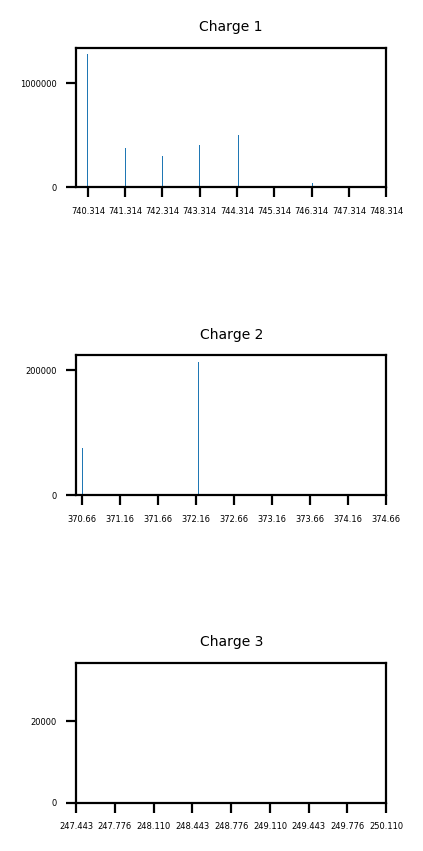

In [134]:
draw_ms(summary, charges=charges, isotopes=isotopes, idx=idx)

### Try to plot a spectra from mzXML

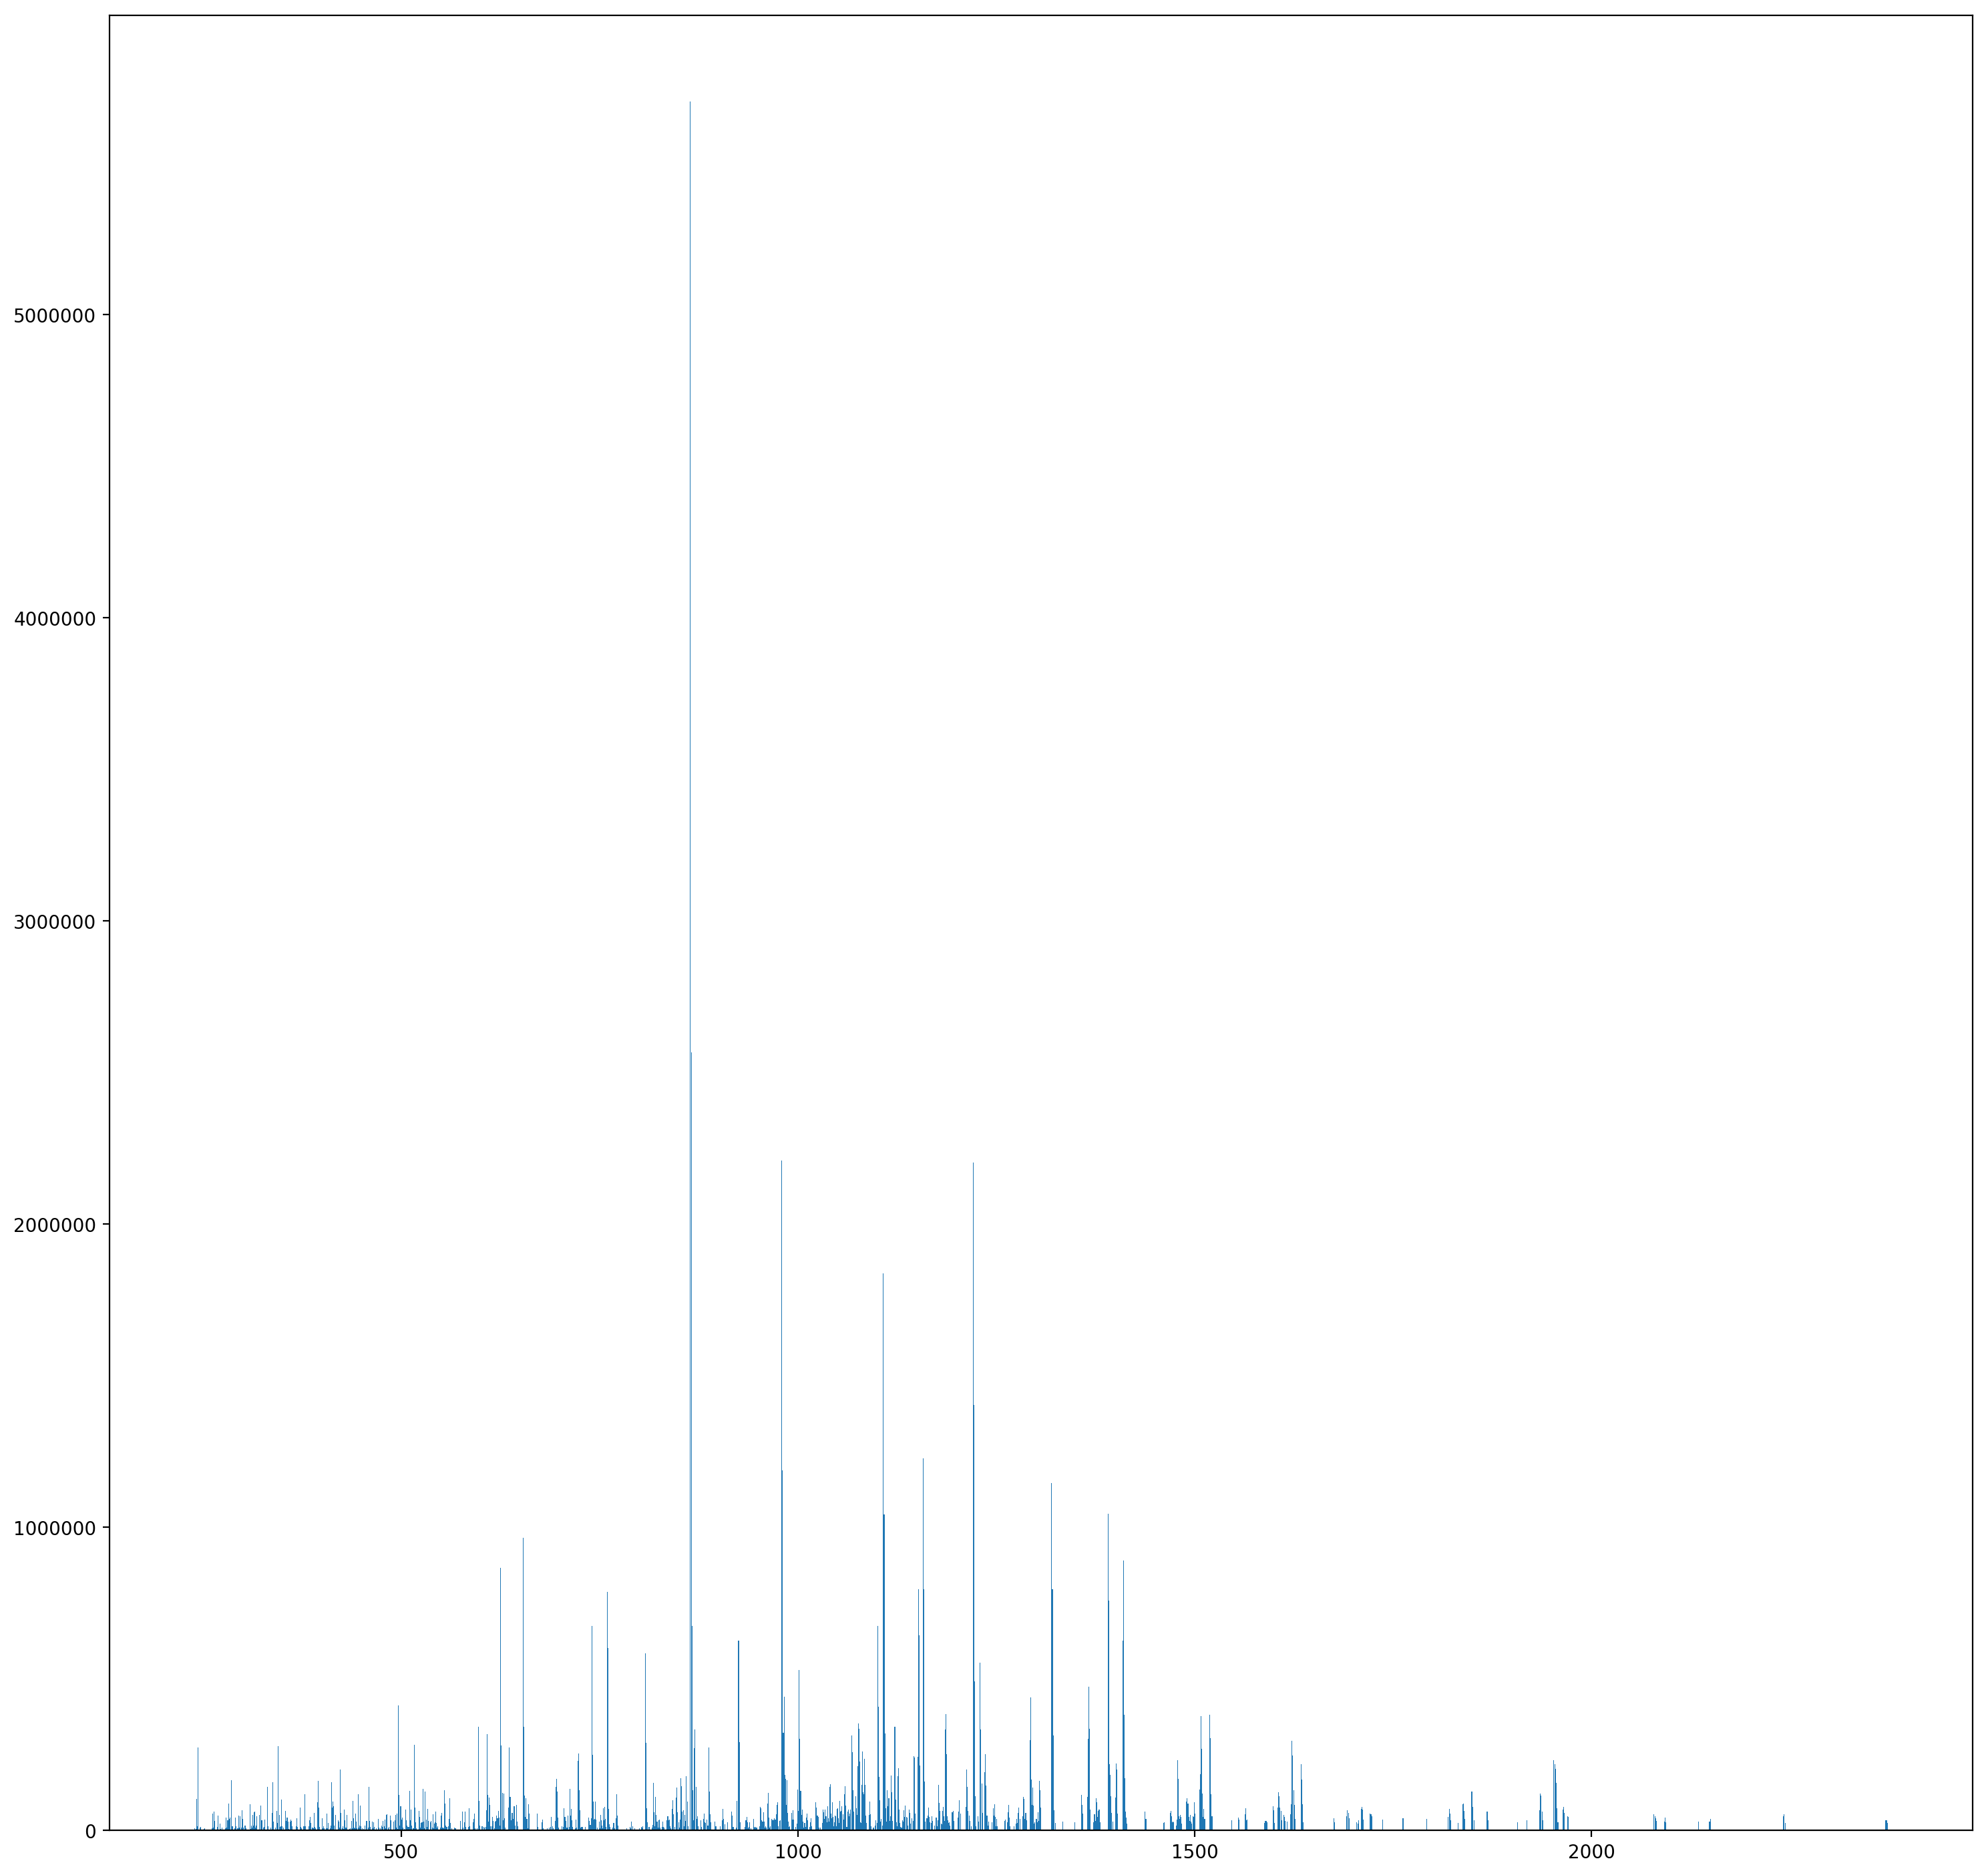

In [17]:
mz = xml[scan_id - 1]['m/z array']
intens = xml[scan_id - 1]['intensity array']
mpl.rcParams['figure.figsize'] = [18, 18]
mpl.rcParams['figure.dpi'] = 200
plt.bar(x=mz, height=intens, width=0.9)
plt.show()